# Aim :
## - To classify / predict whether a patient can suffer a stroke.
## - It is a **binary classification** problem with multiple numerical and categorical features.

# Import the Necessary Libraries :

- **We have used Pandas, Numpy, Matplotlib, Seaborn, imblearn and sklearn libraries.**

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve,classification_report, accuracy_score,precision_recall_curve
from sklearn import linear_model, tree
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import plot_roc_curve
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.metrics import precision_recall_curve
# from sklearn.feature_selection import mutual_info_classif,chi2
# from sklearn import tree
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split

# Loading the dataset

In [107]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #0000FF; color: #ADD8E6; padding: 12px; line-height: 1;">Dataset Information</div></center>

## Shape of our Dataset

In [97]:
print("Shape of our Dataset:", data.shape)

Shape of our Dataset: (5110, 12)


## Column Names of our dataset

In [98]:
print("Column Names of our dataset: ",data.columns )

Column Names of our dataset:  Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


# Dataset Attributes :
    
- **id** : unique identifier
- **gender** : "Male", "Female" or "Other"
- **age** : age of the patient
- **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- **heart_disease** : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- **ever_married** : "No" or "Yes"
- **work_type** : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- **Residence_type** : "Rural" or "Urban"
- **avg_glucose_level** : average glucose level in blood
- **bmi** : body mass index
- **smoking_status** : "formerly smoked", "never smoked", "smokes" or "Unknown"*
- **stroke** : 1 if the patient had a stroke or 0 if not

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #0000FF; color: #ADD8E6; padding: 12px; line-height: 1;">Feature Understanding</div></center>

- ### Count plot for categorical features

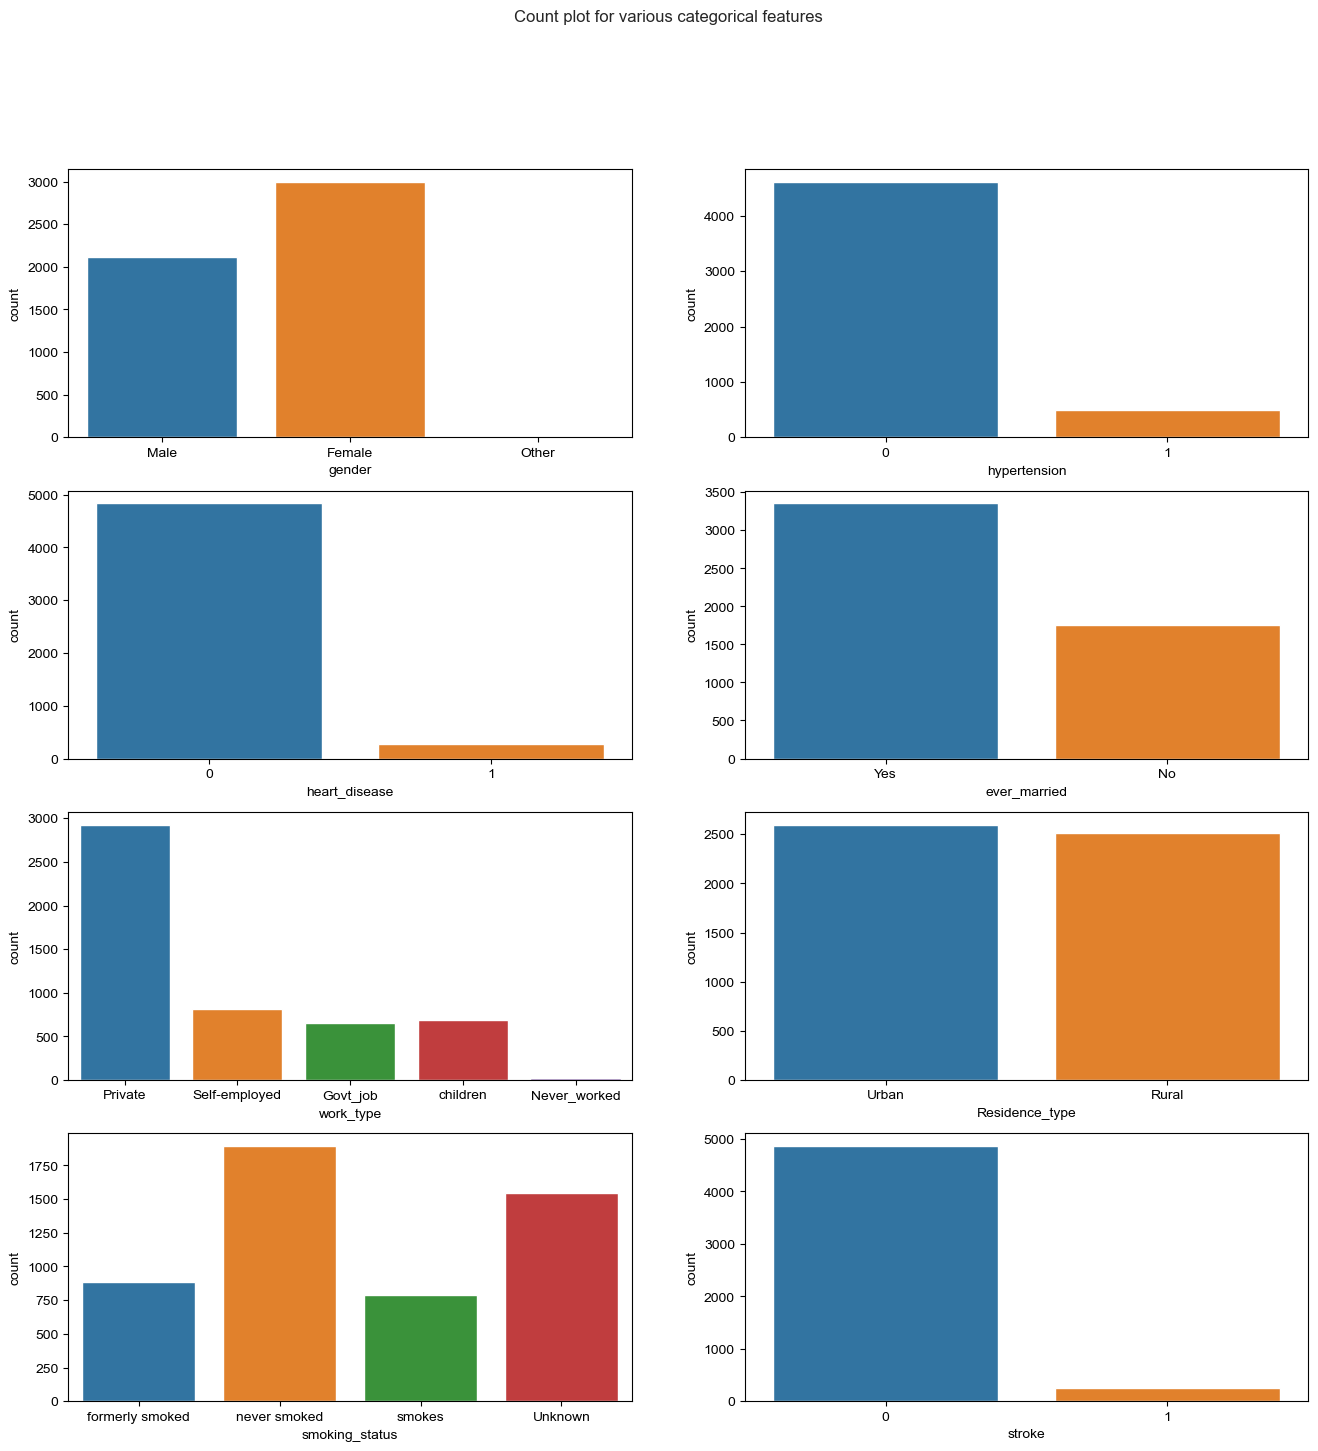

In [156]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=data,x='gender')
sns.countplot(ax=axes[0,1],data=data,x='hypertension')
sns.countplot(ax=axes[1,0],data=data,x='heart_disease')
sns.countplot(ax=axes[1,1],data=data,x='ever_married')
sns.countplot(ax=axes[2,0],data=data,x='work_type')
sns.countplot(ax=axes[2,1],data=data,x='Residence_type')
sns.countplot(ax=axes[3,0],data=data,x='smoking_status')
sns.countplot(ax=axes[3,1],data=data,x='stroke')

plt.show()

- ### Are there any duplicate rows in the dataframe? Let's check it!

In [159]:
duplicated = len(data[data.duplicated()])
print(f'There are {duplicated} duplicated rows')

There are 0 duplicated rows


## Lets computes and displays summary statistics for our data

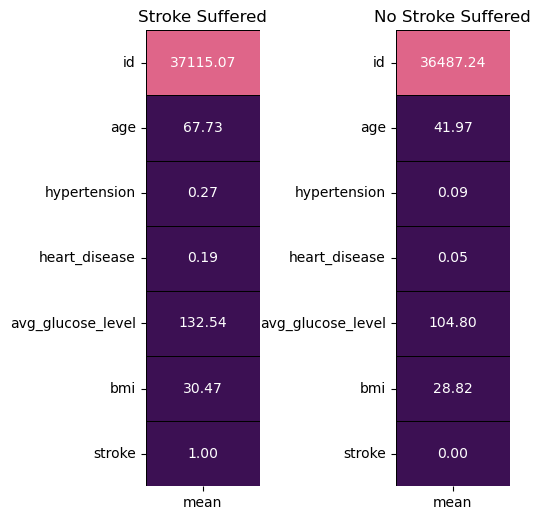

In [99]:
stroke = data[data['stroke'] == 1].describe().T
no_stroke = data[data['stroke'] == 0].describe().T

colors = ['#3C1053','#DF6589']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)

- ### **Mean** values of all the features for cases of **stroke suffered** and **no stroke suffered**.
- ### **age** and **avg_glucose_level** can be solid 1st hand indicators to identify a stroke.
- ### Mean **age** values of patients that suffered a stroke, **67.73**,is much higher than those did not suffer a stroke, **41.97**.
- ### Similarly, **avg_glucose_level** value of **132.54** can indicate a higher chance of suffering from stroke than the **avg_glucose_level** value of **104.80** that has been found in patients that did not suffer a stroke.

## Generate a Heatmap to look for null Values

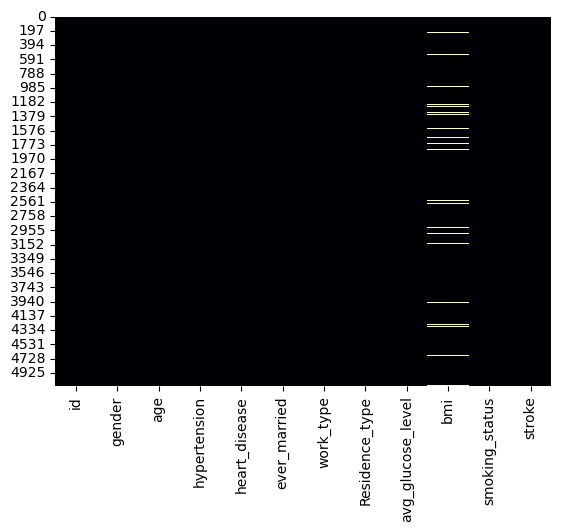

In [100]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

## A few null values are present in the **bmi** feature!

## Fill Missing Values :

In [101]:
l1 = [i for i in tqdm(range(len(data.isnull()['bmi']))) if data.isnull().loc[i,'bmi'] == True]
print('Total Number of Missing Values in bmi feature :', len(l1))

100%|█████████████████████████████████████████████████████████████████| 5110/5110 [00:13<00:00, 379.98it/s]

Total Number of Missing Values in bmi feature : 201


### Descriptive statistics

In [102]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


- ### From the table of descriptive statistics, we observe that mean and median values of **bmi** are very close to each other.
- ### Hence, we will fill the missing values with the **mean values**.

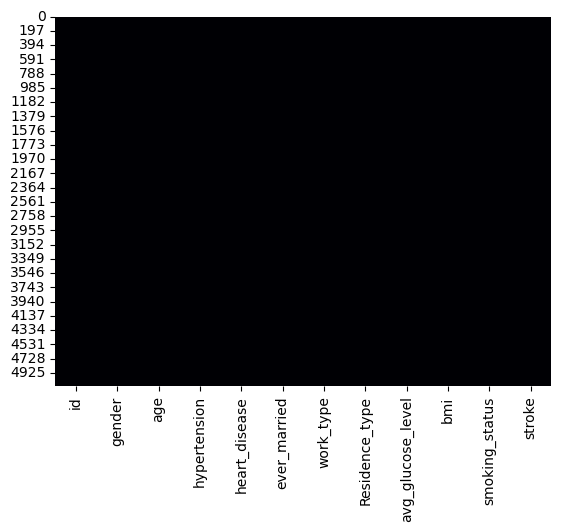

In [108]:
data['bmi'].fillna(data['bmi'].mean(),inplace = True)
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [105]:
l1 = [i for i in tqdm(range(len(data.isnull()['bmi']))) if data.isnull().loc[i,'bmi'] == True]
print('Total Number of Missing Values in bmi feature after filling it with mean value of bmi column :', len(l1))

100%|█████████████████████████████████████████████████████████████████| 5110/5110 [00:13<00:00, 382.18it/s]

Total Number of Missing Values in bmi feature after filling it with mean value of bmi column : 0


- ### Now you can see there is no missing values in bmi feature. 

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #0000FF; color: #ADD8E6; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

## Dividing features into Discrete and Categorical :

- ###  We drop the **id** column as it is just a unique identifier.
- ###  Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a discrete feature.
- ###  Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.
**Eg :** datatype = integer, attribute = discrete feature ; datatype = string, attribute = categorical feature
- ###  Creating a deep copy of the orginal dataset for experimenting with data, visualization and modeling.
- ###  Modifications in the original dataset will not be highlighted in this deep copy.

In [109]:
data.drop(columns = ['id'],inplace = True)
col = list(data.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(data[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

data['age'] = data['age'].astype(int)
df1 = data.copy(deep = True)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi


- ### **Categorical Features** : gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke
- ### **Discrete Features** : age, avg_glucose_level, bmi

- ## We now **Label Encode** the data **categorical text data** features. 
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

Example : 
- Suppose we have a column Height in some dataset. 

 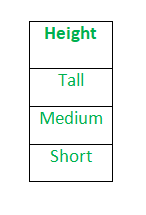

- After applying label encoding, the Height column is converted into: 

 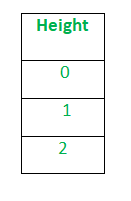

where 0 is the label for tall, 1 is the label for medium, and 2 is a label for short height.

In [111]:
le = LabelEncoder()
text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    df1[i] = le.fit_transform(df1[i])
    l3.append(list(df1[i].unique())); l4.append(list(le.inverse_transform(df1[i].unique())))
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation


100%|███████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 501.46it/s]

gender  :  [1 0 2]  =  ['Male' 'Female' 'Other']
ever_married  :  [1 0]  =  ['Yes' 'No']
work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  :  [1 0]  =  ['Urban' 'Rural']
smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


- We store the label encoded transformations inside a dictionary that gives us the information about the encoded value and it's original value! 
- We add the remaining 2 features manually i.e **heart_disease** & **hypertension**!

In [113]:
tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_data_features[i]][j] = k

tf1['hypertension'] = {0 : 'No Hypertension', 1 : 'Hypertension'} 
tf1['heart_disease'] = {0 : 'No Heart Disease', 1 : 'Heart Disease'}
tf1

{'gender': {1: 'Male', 0: 'Female', 2: 'Other'},
 'ever_married': {1: 'Yes', 0: 'No'},
 'work_type': {2: 'Private',
  3: 'Self-employed',
  0: 'Govt_job',
  4: 'children',
  1: 'Never_worked'},
 'Residence_type': {1: 'Urban', 0: 'Rural'},
 'smoking_status': {1: 'formerly smoked',
  2: 'never smoked',
  3: 'smokes',
  0: 'Unknown'},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

## Target Variable Visualization (stroke) : 

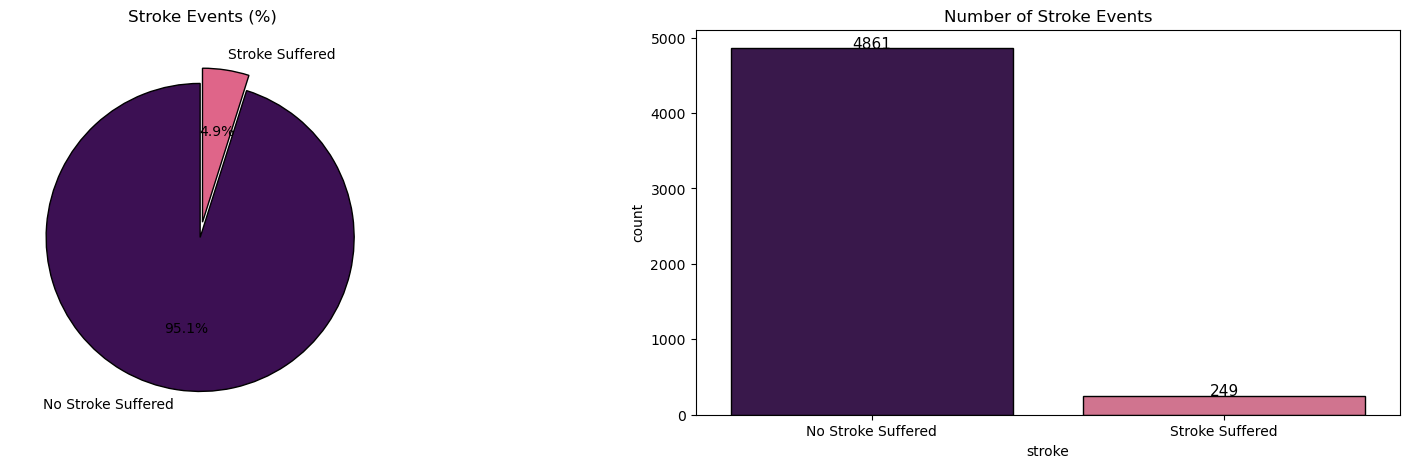

In [114]:
l = list(df1['stroke'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Stroke Suffered','Stroke Suffered'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Stroke Events (%)');

plt.subplot(1,2,2)
ax = sns.countplot('stroke',data = df1, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Stroke Suffered','Stroke Suffered'])
plt.title('Number of Stroke Events');
plt.show()

### - Clearly, the dataset is unbalanced in the favour of **no stroke**.
### - **19 : 1** ratio is observed for **No Stroke : Stroke!**
### - Thus, due to such heavy bias towards cases of **No Stroke**, predictions cannot be trusted!

# Discrete Features :

- ## Distribution of Discrete Features :

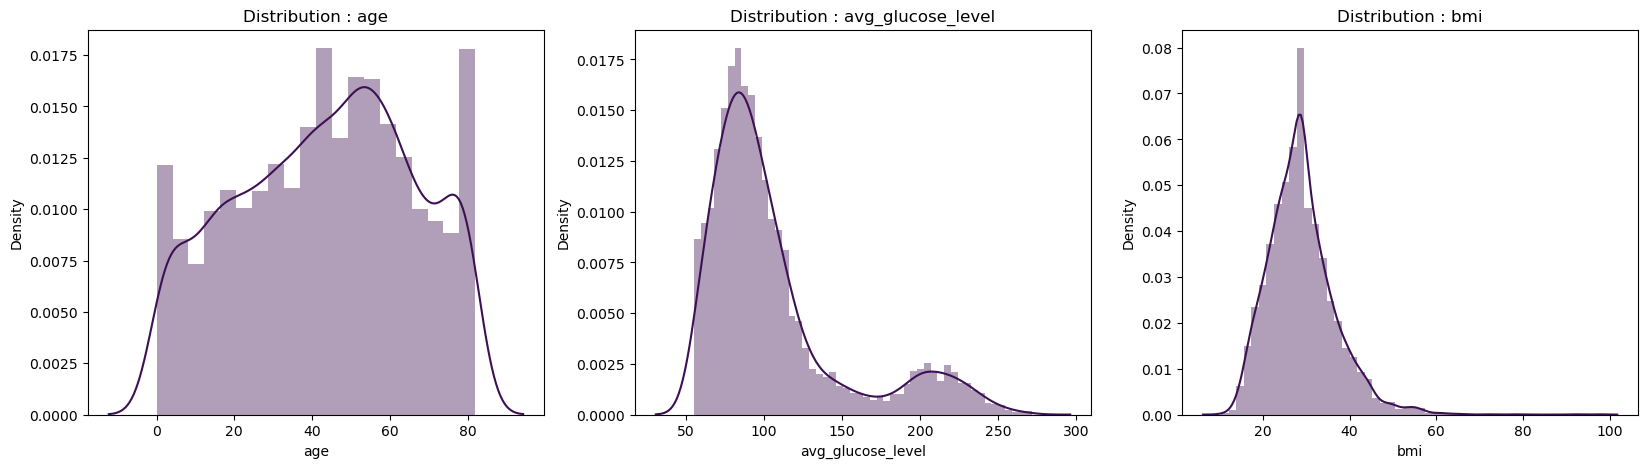

In [115]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[discrete_features[i]],color = colors[0])
    title = 'Distribution : ' + discrete_features[i]
    plt.title(title)
plt.show()

- ### Data distribution for **age** has dominant values around : **10**, **60** & **80**.
- ### **avg_glucose_level** has 2 peaks of uneven heights present at values around : **100** & **200**.
- ### **bmi** has a near about **normal distribution** but it has values in low numbers towards the right side! 

## **Discrete Features w.r.t Target Variable (stroke)**:

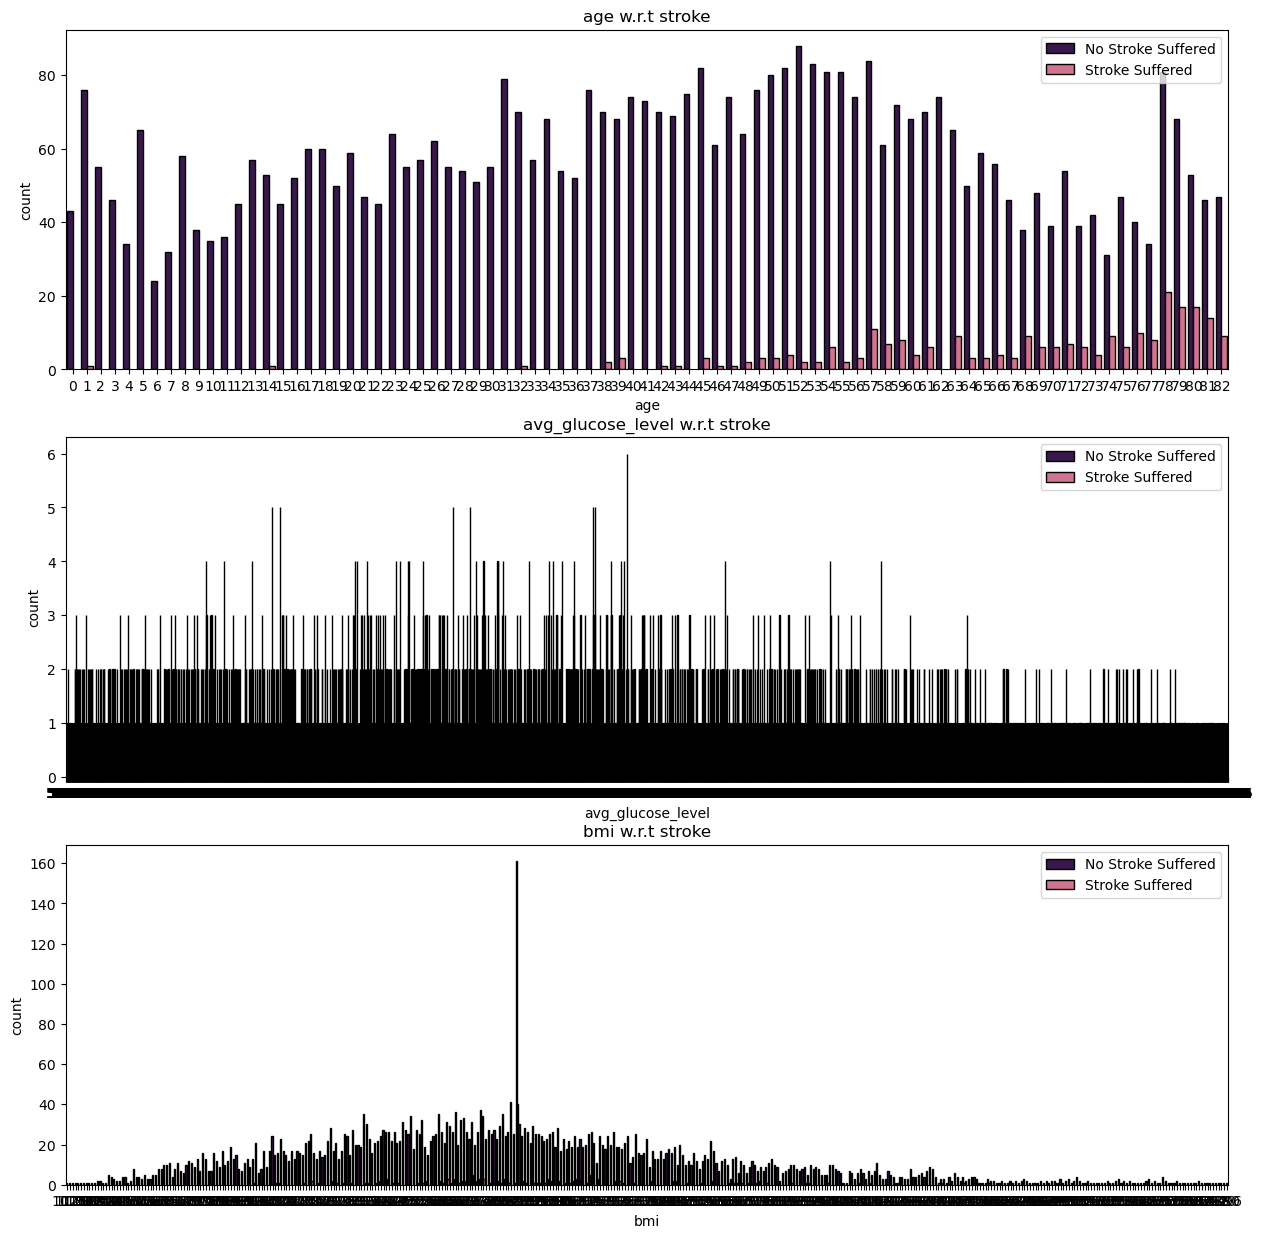

In [116]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(discrete_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(discrete_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'] ,loc = 'upper right')
    title = discrete_features[i] + ' w.r.t stroke'
    plt.title(title);

- ### Because of too many unique data points in the **discrete_features**, it is difficult to gain any type of insight. Thus, we will convert these features into **categorical features** for visualizations.
- ### We scale the data points of these features to a constant value that represents a range of values.(like mean)
- ### Here, we divide the data points by a constant value and assign it's quotient value as the representative constant. The scaling constants are decided by looking into the data & intuition. 

In [117]:
df1['age_group'] = [ int(i / 5) for i in df1['age']]
df1['avg_glucose_level_group'] = [ int(i / 20) for i in df1['avg_glucose_level']]
df1['bmi_group'] = [ int(i / 5) for i in df1['bmi']]

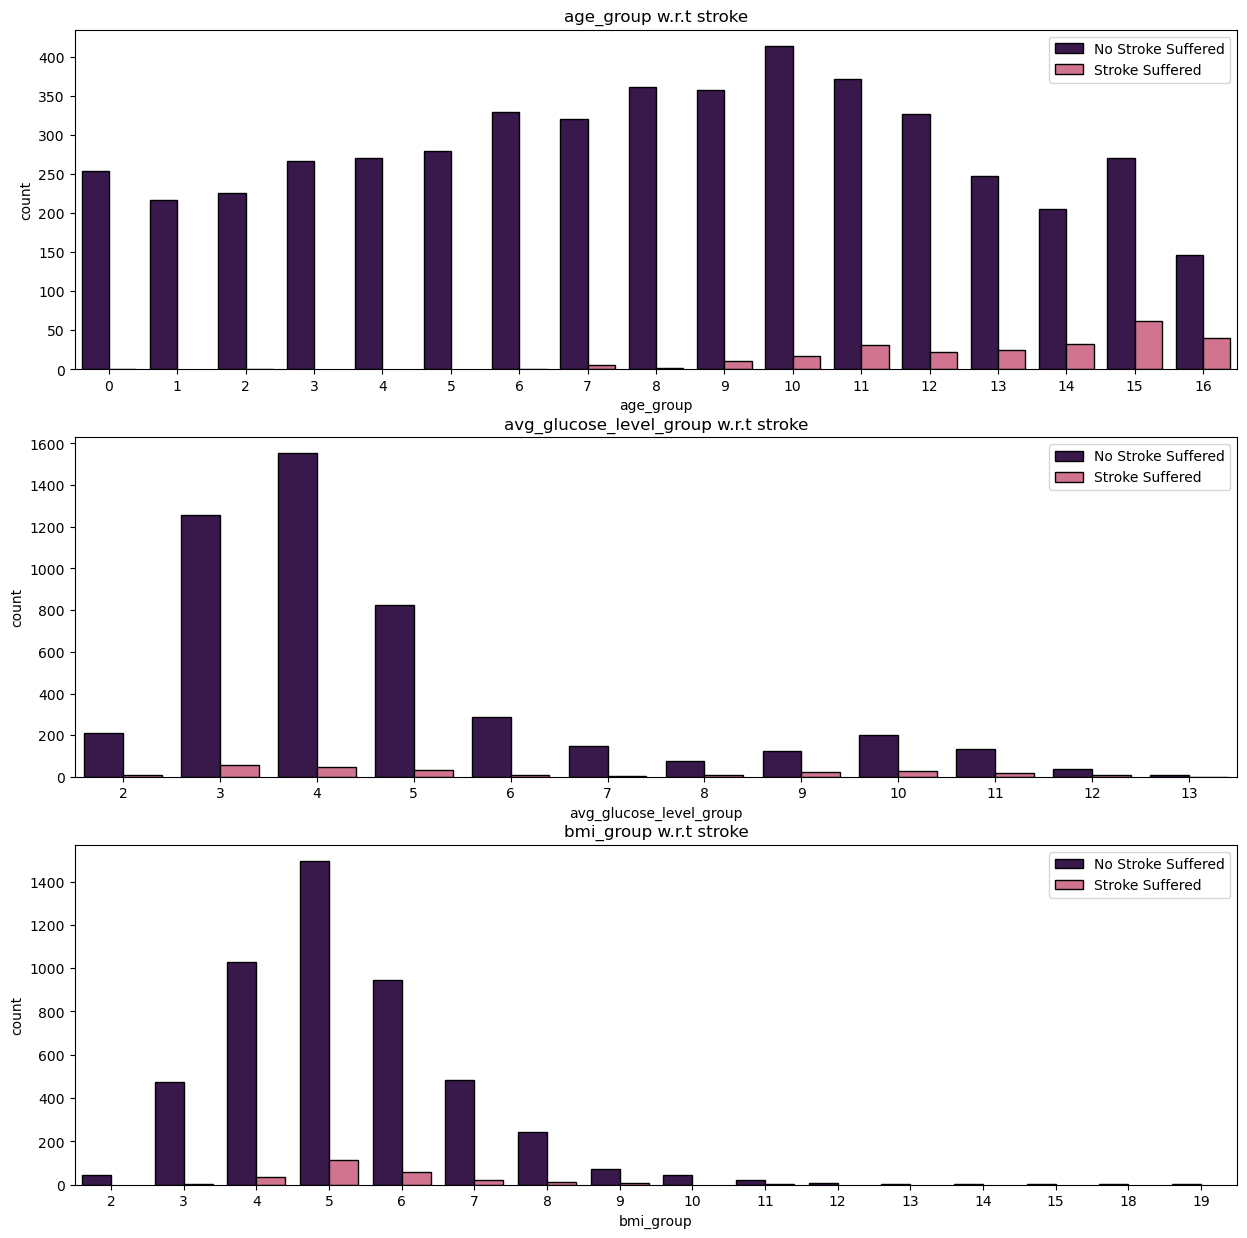

In [118]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
group_numerical_features = [i + '_group' for i in ['age','avg_glucose_level','bmi']]

for i in range(len(group_numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(group_numerical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'] ,loc = 'upper right')
    title = group_numerical_features[i] + ' w.r.t stroke'
    plt.title(title);

- ### For **age**, cases of **stroke suffered** can be observed for the values between **35**(7x5) - **80**(16x5). It is not a dominant patch due to the imbalance nature of the dataset.  
- ### For **avg_glucose_level**, 2 groups can be found : **60**(3x20) - **100**(5x20) & **180**(9x20) - **220**(11x20). Patients with **avg_glucose_level** present in the 1st group are more prone to suffering **stroke** than group 2.
- ### **bmi** values from **15**(3x5) - **40**(8x5) have displayed more cases of **stroke**.

## **Categorical Features** :

- ### **Distribution of Categorical Features** :

In [119]:
categorical_features.remove('stroke')

- ### We remove the **stroke** feature from the list of categorical features as it is the **target** variable and we will treat it separately!

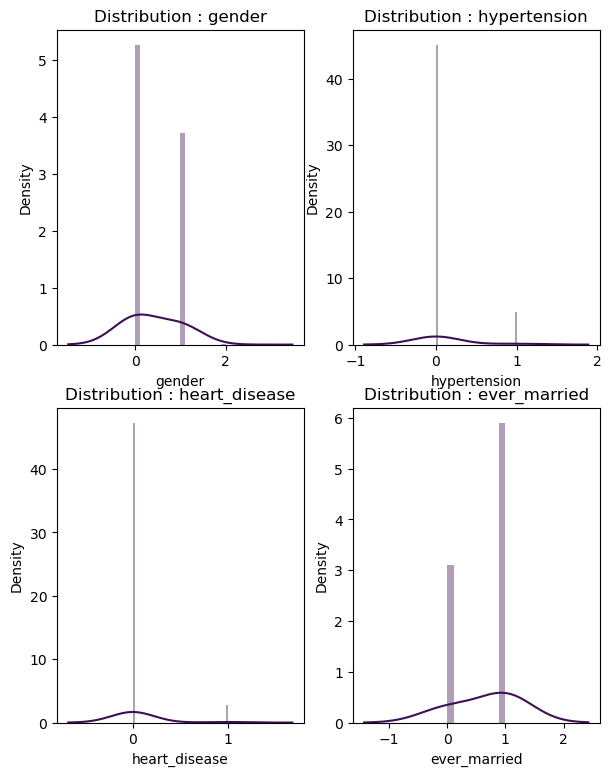

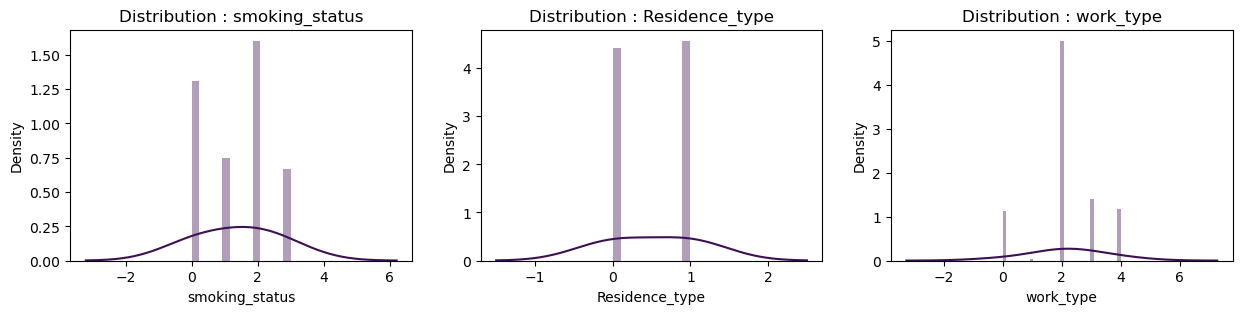

In [120]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (7,9))
for i in range(len(categorical_features[:4])):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

- ### All the categorical features are **Normally Distributed**.

## Categorical Features w.r.t Target Variable (stroke) :

posx and posy should be finite values
posx and posy should be finite values


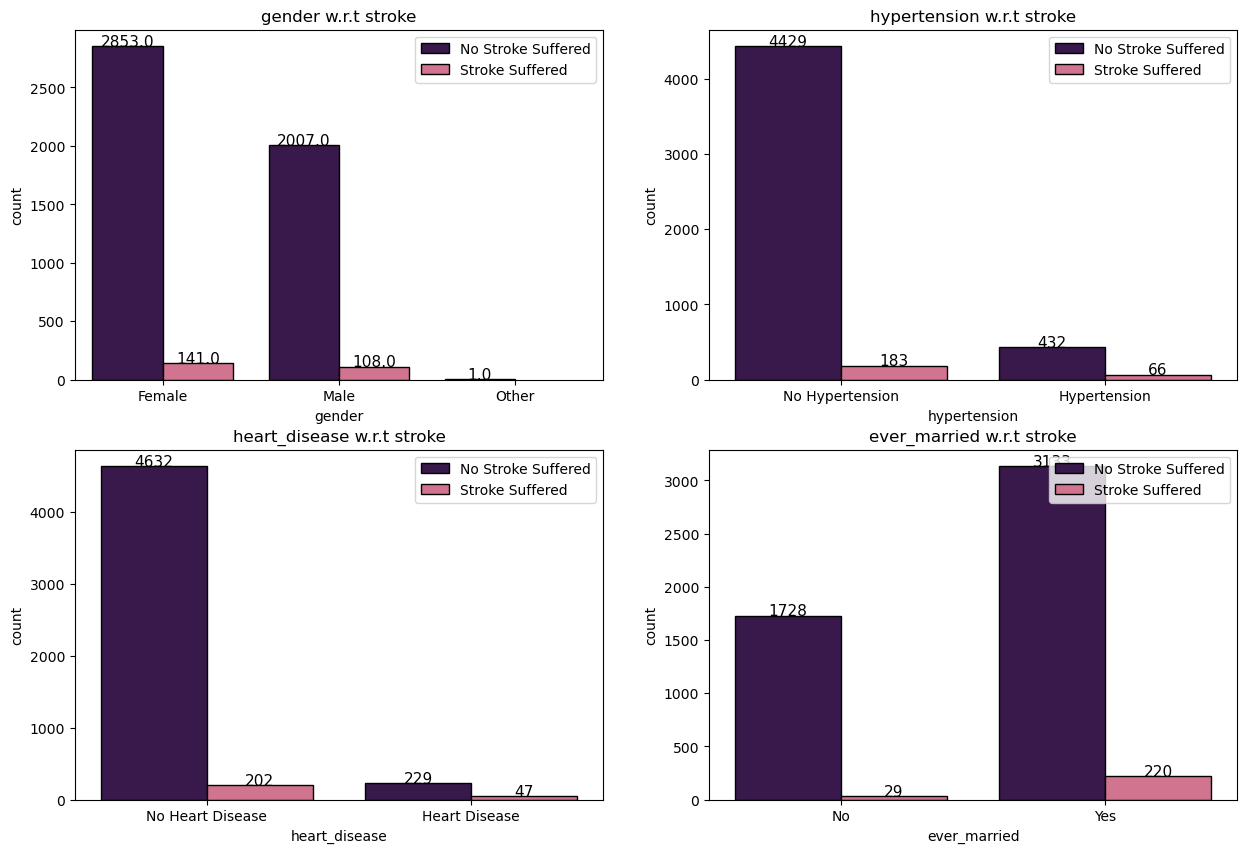

posx and posy should be finite values
posx and posy should be finite values


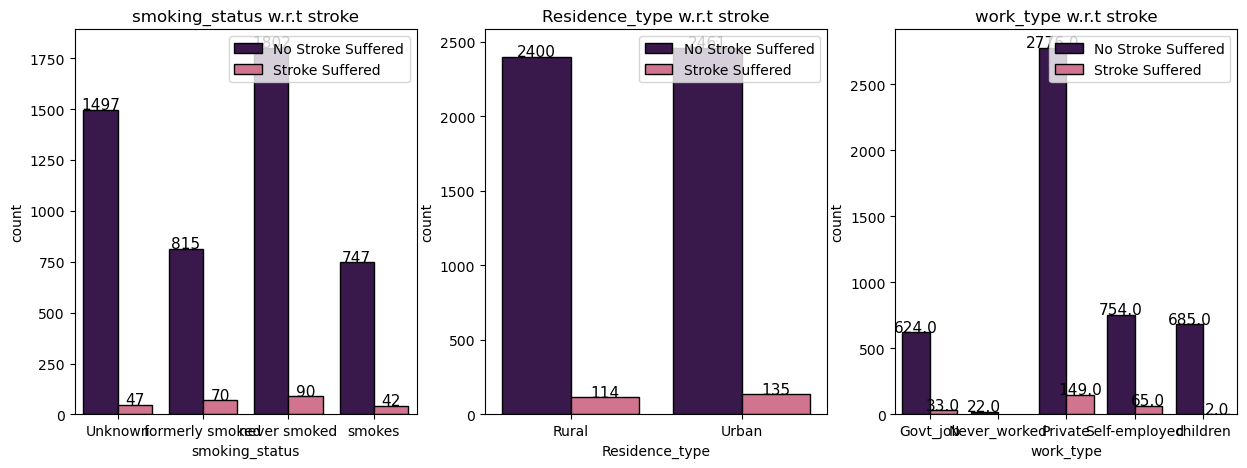

In [121]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

- All the graphs near about share the same pattern i.e displaying low number of **stroke** cases and no clear cut reason to point towards.  
- **Female** population has recorded more cases of **stroke** than **male**.
- Interestingly, people with **no hypertension** & **no heart disease** have displayed to be more prone to **suffering stroke** than people that have these medical conditions.
- According to the dataset, people that have been **married** have **suffered stroke** more than those people who have never married.
- When it comes to **smoking_status**, people that have **never smoked** have topped the numbers with **formerly smoked** people coming at the 2nd position to record **stroke** cases.
- Not much info can be gained from **Residence_type** & **work_type**, however **Private** workers **suffered stroke** cases more than any other worker.

### Categorical Features w.r.t Positive Cases of stroke :

In [122]:
gender = df1[df1['stroke'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

hypertension = df1[df1['stroke'] == 1]['hypertension'].value_counts()
hypertension = [hypertension[0] / sum(hypertension) * 100, hypertension[1] / sum(hypertension) * 100]

heart_disease = df1[df1['stroke'] == 1]['heart_disease'].value_counts()
heart_disease = [heart_disease[0] / sum(heart_disease) * 100, heart_disease[1] / sum(heart_disease) * 100]

ever_married = df1[df1['stroke'] == 1]['ever_married'].value_counts()
ever_married = [ever_married[0] / sum(ever_married) * 100, ever_married[1] / sum(ever_married) * 100]

work_type = df1[df1['stroke'] == 1]['work_type'].value_counts()
work_type = [work_type[0] / sum(work_type) * 100, work_type[2] / sum(work_type) * 100,
             work_type[3] / sum(work_type) * 100, work_type[4] / sum(work_type) * 100,]

Residence_type = df1[df1['stroke'] == 1]['Residence_type'].value_counts()
Residence_type = [Residence_type[0] / sum(Residence_type) * 100, Residence_type[1] / sum(Residence_type) * 100]

smoking_status = df1[df1['stroke'] == 1]['smoking_status'].value_counts()
smoking_status = [smoking_status[0] / sum(smoking_status) * 100, smoking_status[1] / sum(smoking_status) * 100,
                  smoking_status[2] / sum(smoking_status) * 100, smoking_status[3] / sum(smoking_status) * 100]

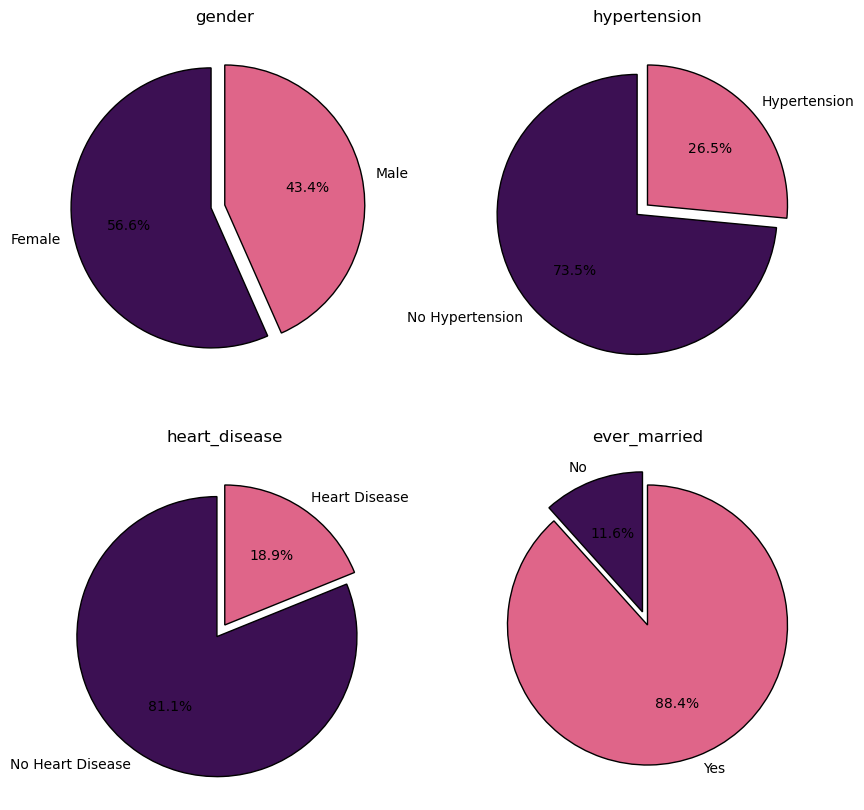

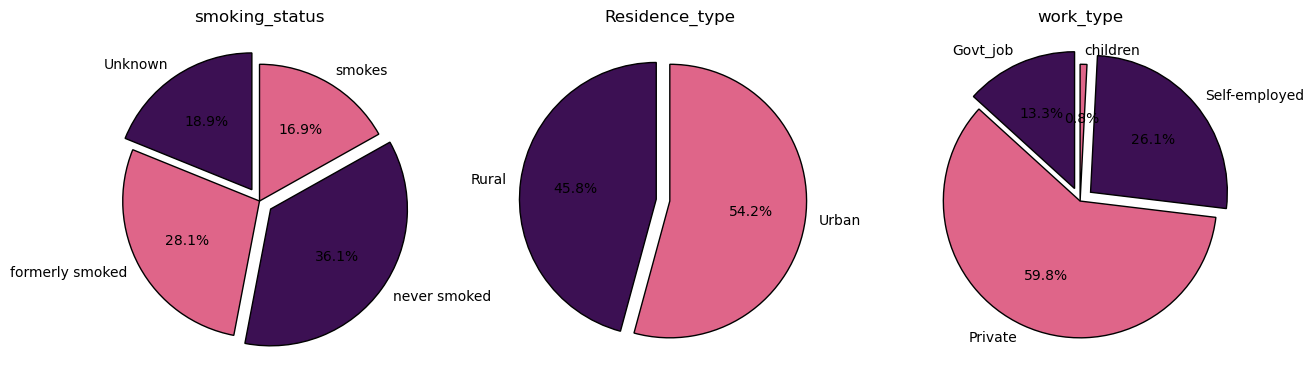

In [123]:
l1 = [gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status]

ax,fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
for i in range(4):
    if len(l1[i]) == 2:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(-1,-4,-1):
    if len(l1[i]) == 2:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);

- According to the data, **female** population is more susceptible to **suffering stroke**.
- From the above visuals, surprisingly, **stroke** cases were found more in patients that **did not have any medical conditions like heart_disease or hypertension**!
- People that have been **married** have the highest probability of suffering from **stroke**. 
- When it comes to **stroke & smoking_status**, people that have **never smoked** are most susceptible. They are followed by **formerly smoked**. Surprisingly, people that **smokes** have the lowest chances of **suffering from stroke**.
- People living in **Urban Residence Type** have edged the people living in **Rural Residence Type** in terms of **stroke** cases.
- When it comes to **work_type**, people working in **Private** have recorded more than **50%+** of **stroke** cases. It is followed by **Self-employed** & **Govt_job** that record half and quarter of the cases that **Private** recorderd respectively.

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #0000FF; color: #ADD8E6; padding: 12px; line-height: 1;">Feature Relationships</div></center>

## Categorical features vs Discrete features w.r.t Target variable (stroke) :

- ### Gender vs Discrete Features :

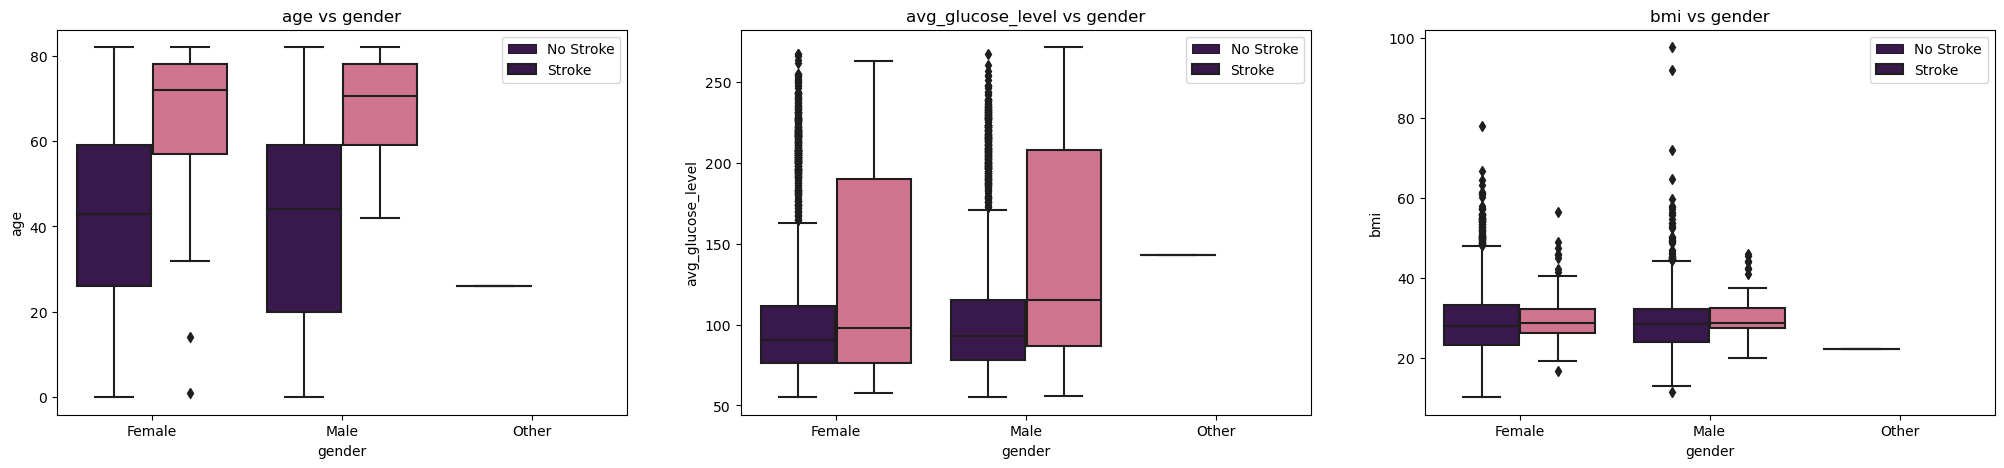

In [124]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'gender',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['gender'][j] for j in sorted(df1['gender'].unique())])
    title = discrete_features[i] + ' vs gender'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- For both **male** & **female** population, **age** of those **suffering from stroke** is **60+**.
- For majority of the **avg_glucose_level** values, both **gender** have recorded significant cases of **stroke**.
- For **male** population, the lower limit of **bmi** values is slightly higher than the **female**. Overall, both the **gender** overlap the same **bmi** values for cases of **stroke**.

- ### Hypertension vs Discrete Features :

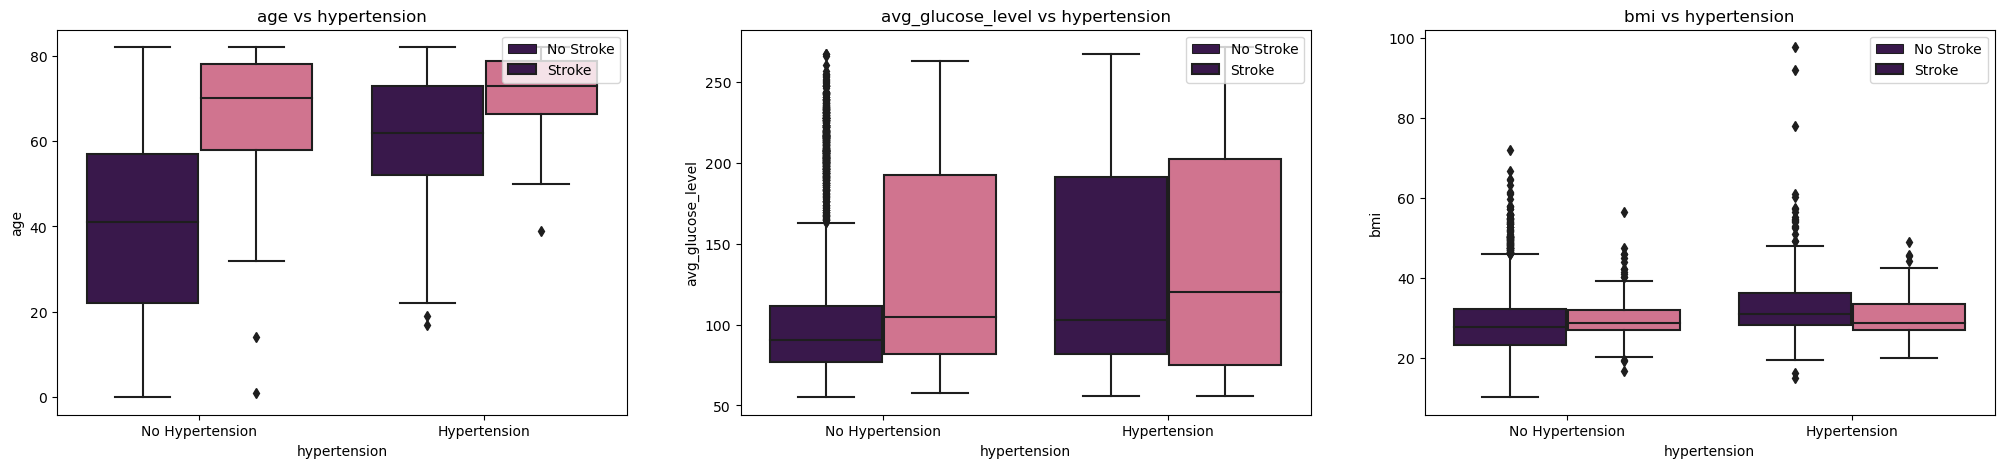

In [125]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'hypertension',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['hypertension'][j] for j in sorted(df1['hypertension'].unique())])
    title = discrete_features[i] + ' vs hypertension'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- Wierdly, cases of **stroke** found in people having **hypertension** have a high lower limit of the **age 60+** than those who do not suffer from **hypertension**.
- When it comes to **hypertension & avg_glucose_level**, cases of **stroke** & **no stroke** near about share the same values.
- Due to **hypertension**, lower limits of **bmi** values are slightly reduced making people prone to **stroke**. 

- ### Heart_disease vs Discrete Features :

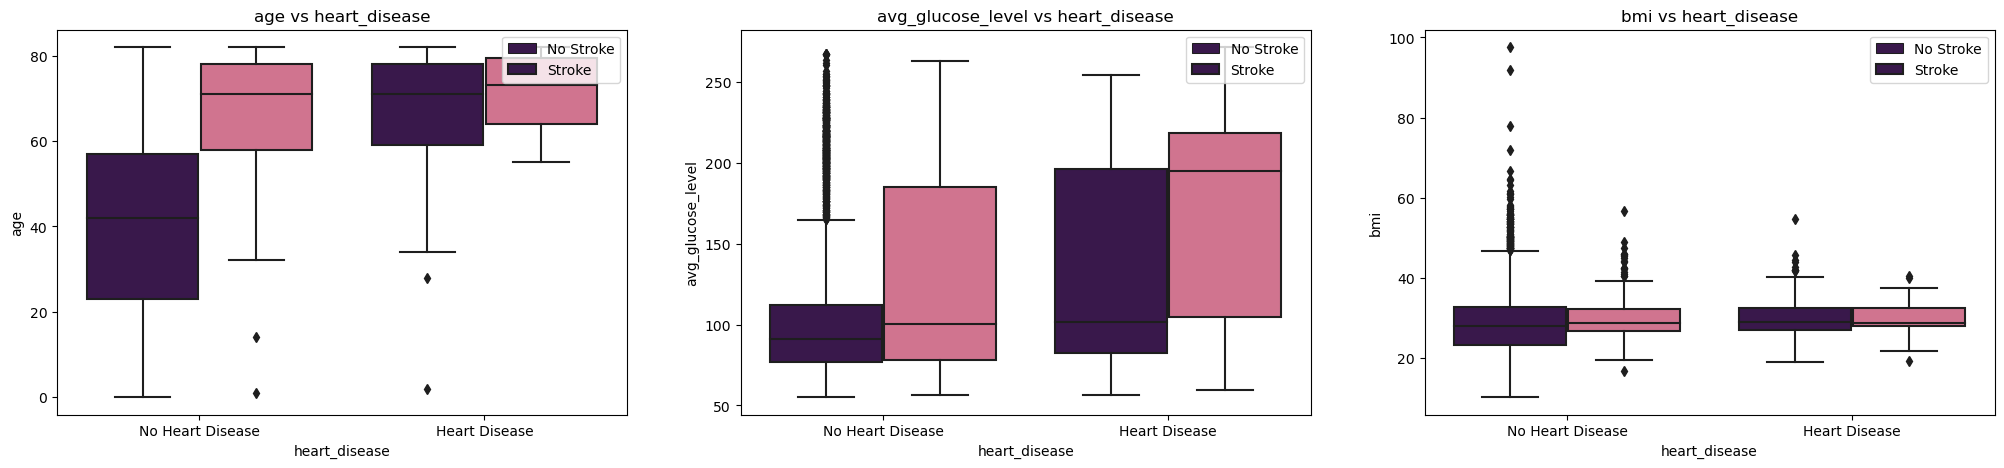

In [126]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'heart_disease',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['heart_disease'][j] for j in sorted(df1['heart_disease'].unique())])
    title = discrete_features[i] + ' vs heart_disease'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- Graphs of **hypertension** & **heart_disease** against discrete features are very similar with slight differences.
- They share the same effects on **stroke**.

- ### Ever_married vs Discrete Features :

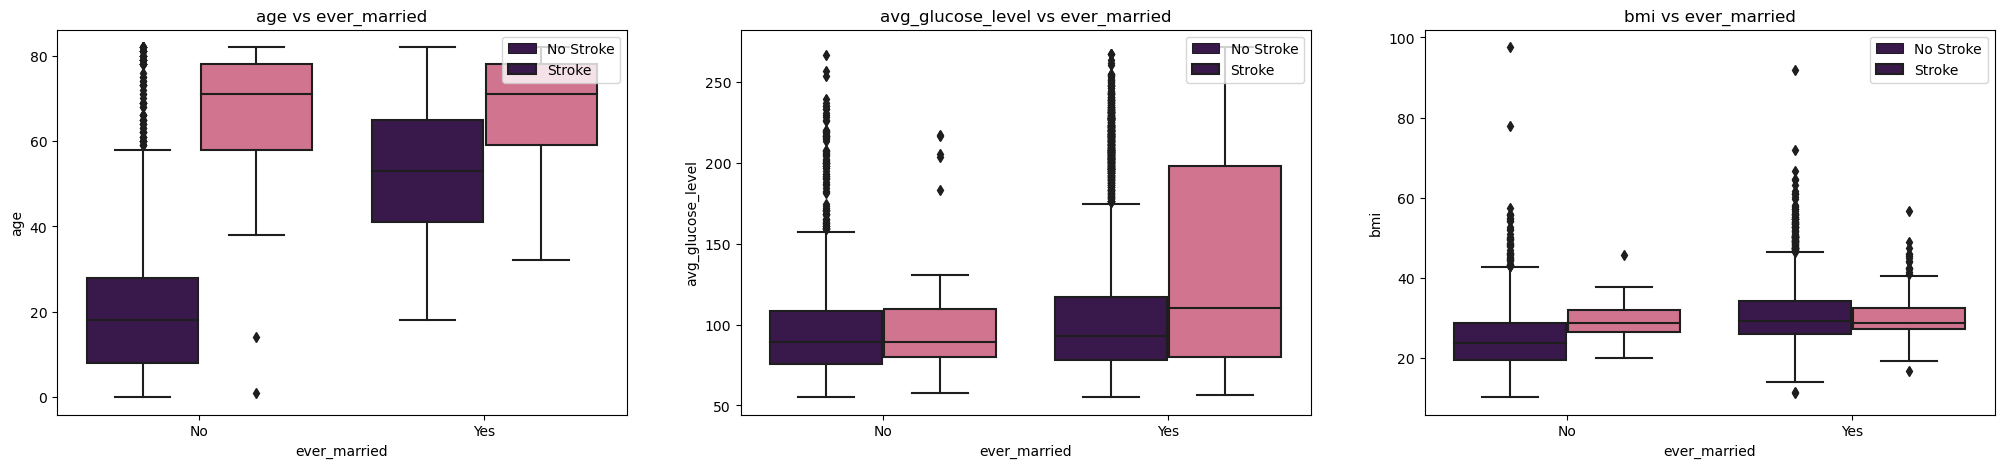

In [127]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'ever_married',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['ever_married'][j] for j in sorted(df1['ever_married'].unique())])
    title = discrete_features[i] + ' vs ever_married'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- For **ever_married vs discrete features**, repeated insights can be found.
- People that have been **married** have displayed cases of **stroke** for near about all the values of **avg_glucose_level**.

- ### Work_type vs Discrete Features :

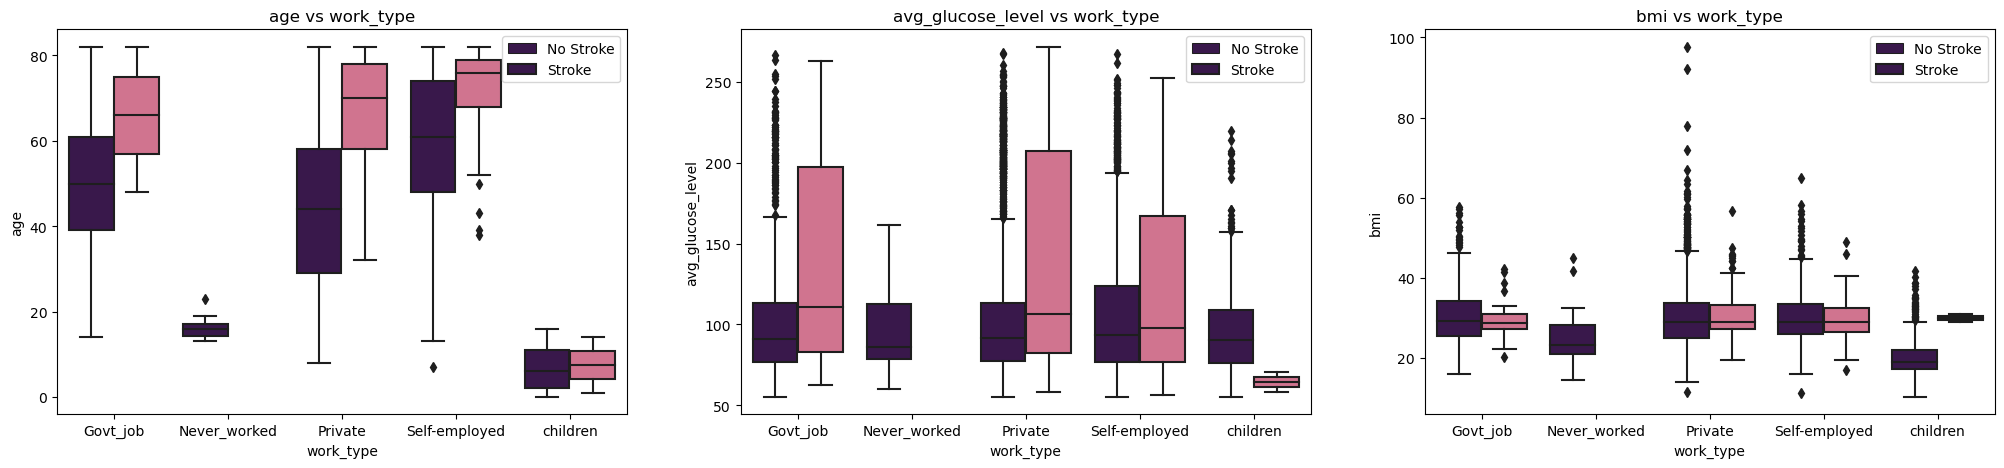

In [128]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'work_type',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['work_type'][j] for j in sorted(df1['work_type'].unique())])
    title = discrete_features[i] + ' vs work_type'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- Irrespective of the **work_type**, **stroke** cases have been found for **age of 60+** except for **children**.
- Clearly, people that have worked to earn a living have suffered from **stroke**. 
- **Stroke** cases have been found more in people working in a job i.e **Govt_job** & **Private** than those who are **Self-employed**.

- ### Residence_type vs Discrete Features :

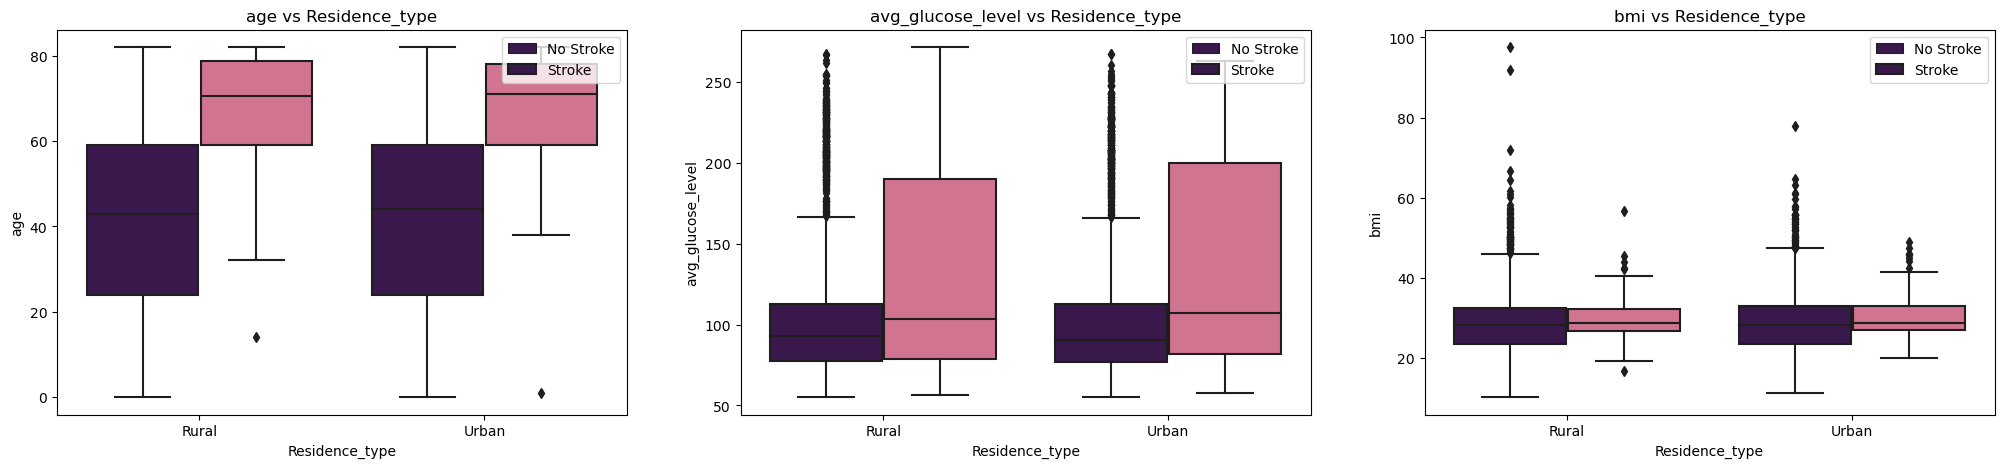

In [129]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'Residence_type',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['Residence_type'][j] for j in sorted(df1['Residence_type'].unique())])
    title = discrete_features[i] + ' vs Residence_type'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- The graphs of **Rural Residence_type** & **Urban Residence_type** against discrete features w.r.t **stroke** are identical.
- They cannot be separated from each other. They repeat the insights that have been highlighted uptill now.

- ### Smoking_status vs Discrete Features :

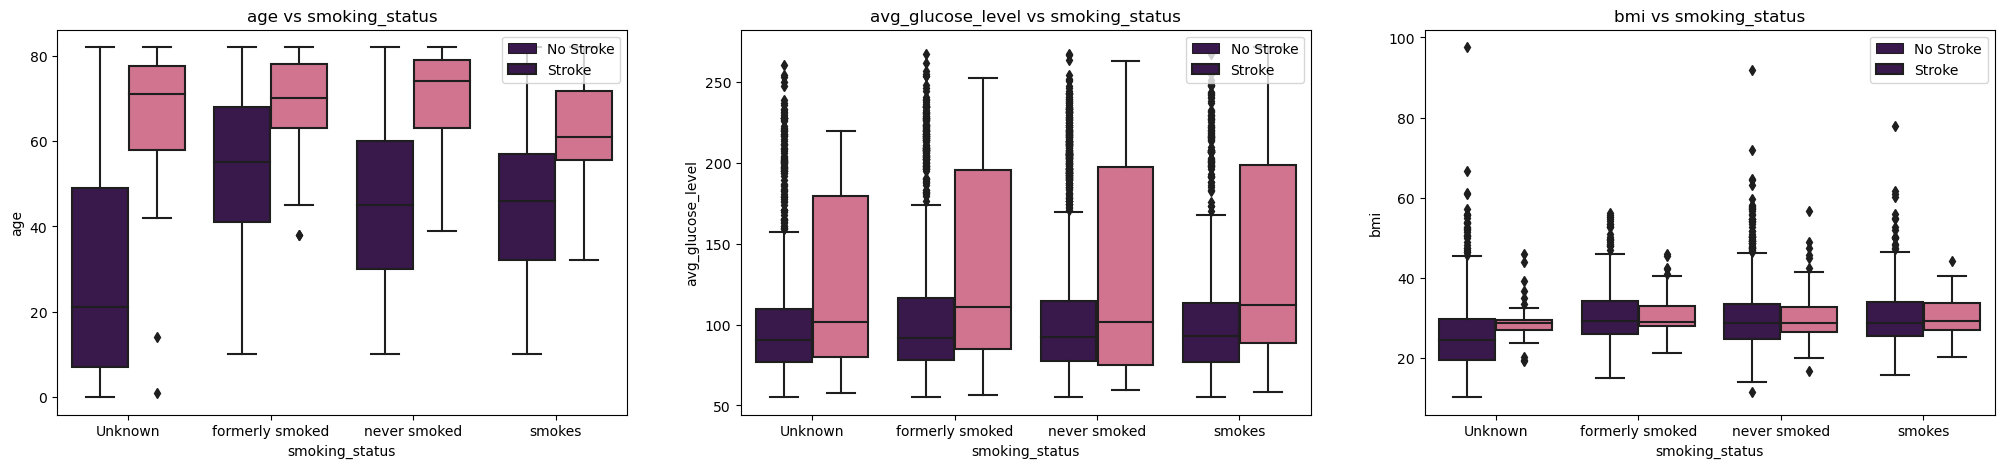

In [130]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'smoking_status',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['smoking_status'][j] for j in sorted(df1['smoking_status'].unique())])
    title = discrete_features[i] + ' vs smoking_status'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- Irrespective of **smoking_status**, people **suffering from stroke** have been detected at **age around 60**.
- Similar to **age**, same values of **avg_glucose_level** have been found in **stroke** cases irrespective of **smoking_status**.
- However, because of the **smoking_status**, range of values for which cases of **stroke** differ. Range of values of people that **smokes** is slightly higher than everyone else.

### Discrete features vs Discrete features w.r.t Target variable (stroke) :

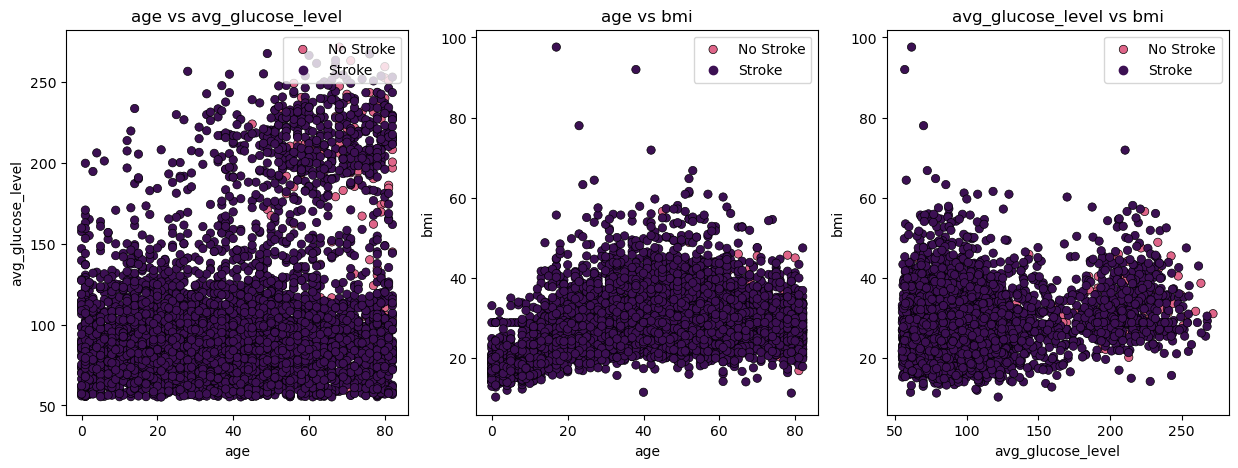

In [131]:
a = 0
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5),squeeze = False)
for i in range(len(discrete_features) - 1):
    for j in range(len(discrete_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(1,3,a)
            sns.scatterplot(x = discrete_features[i],y = discrete_features[j],data = df1,hue = 'stroke',palette = colors,edgecolor = 'black');
            title = discrete_features[i] + ' vs ' + discrete_features[j]
            plt.legend(['No Stroke','Stroke'], loc = 'upper right',)
            plt.title(title)

- Due to the imbalance nature of the data, cases of **stroke** & **no stroke** cannot be separated.
- No insights can be interpreted from the above graphs.

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #0000FF; color: #ADD8E6; padding: 12px; line-height: 1;">Summary of EDA</div></center>

### Order / Values of features for positive cases of stroke :

- **Categorical Features (Order) :**
    
    - **gender** : female > male
    - **hypertension** : no hypertension > hypertension
    - **heart_disease** : no heart disease > heart disease
    - **ever_married** : married > no married
    - **working_type** : Private > Self-employed > Govt_job > children 
    - **Residence_type** : Urban > Rural
    - **smoking_status** : never smoked > formerly smoked > smokes


- **Discrete Features (Range) :**
    
    - **age** : 55 - 80 
    - **avg_glucose_level** : 80 - 200
    - **bmi** : 20 - 40


- **According to the data, these order / range of values leads to heart failures.**

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #0000FF; color: #ADD8E6; padding: 12px; line-height: 1;">Domain Information</div></center>

- **Categorical Features (Order) :**
    
    - **gender** : male > female
    - **hypertension** : hypertension > no hypertension
    - **heart_disease** : heart disease > no heart disease
    - **ever_married** : married = not married 
    - **working_type** : Stress of the work can lead to stroke.
    - **Residence_type** : Mortality due to stroke is higher in rural areas than urban areas due to poor medical treatment. 
    - **smoking_status** : Smoking increases the risk of stroke.


- **Discrete Features (Range) :**
    
    - **age** : The chance of having a stroke about doubles every 10 years after age 55. 
    - **avg_glucose_level** : High blood glucose is found in stroke cases. A value of 126+ has been observed alot. 
    - **bmi** : High bmi values increases the chances of ischemic stroke.


- All the information mentioned is gathered from websites and research papers. We will use this information for cross checking the summary of EDA and feature selection.


- Conclusions obtained from the EDA contradict the Domain Information for the features : **hypertension**, **heart_disease** and **smoking_status**.


- This difference is probably because of the **Unbalanced dataset**!


- Thus, we will carry out the feature engineering process, balance the dataset using **SMOTE analysis** and feed the balanced to the ML algorithms.

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #0000FF; color: #ADD8E6; padding: 12px; line-height: 1;">Feature Engineering</div></center>

### Correlation Matrix :

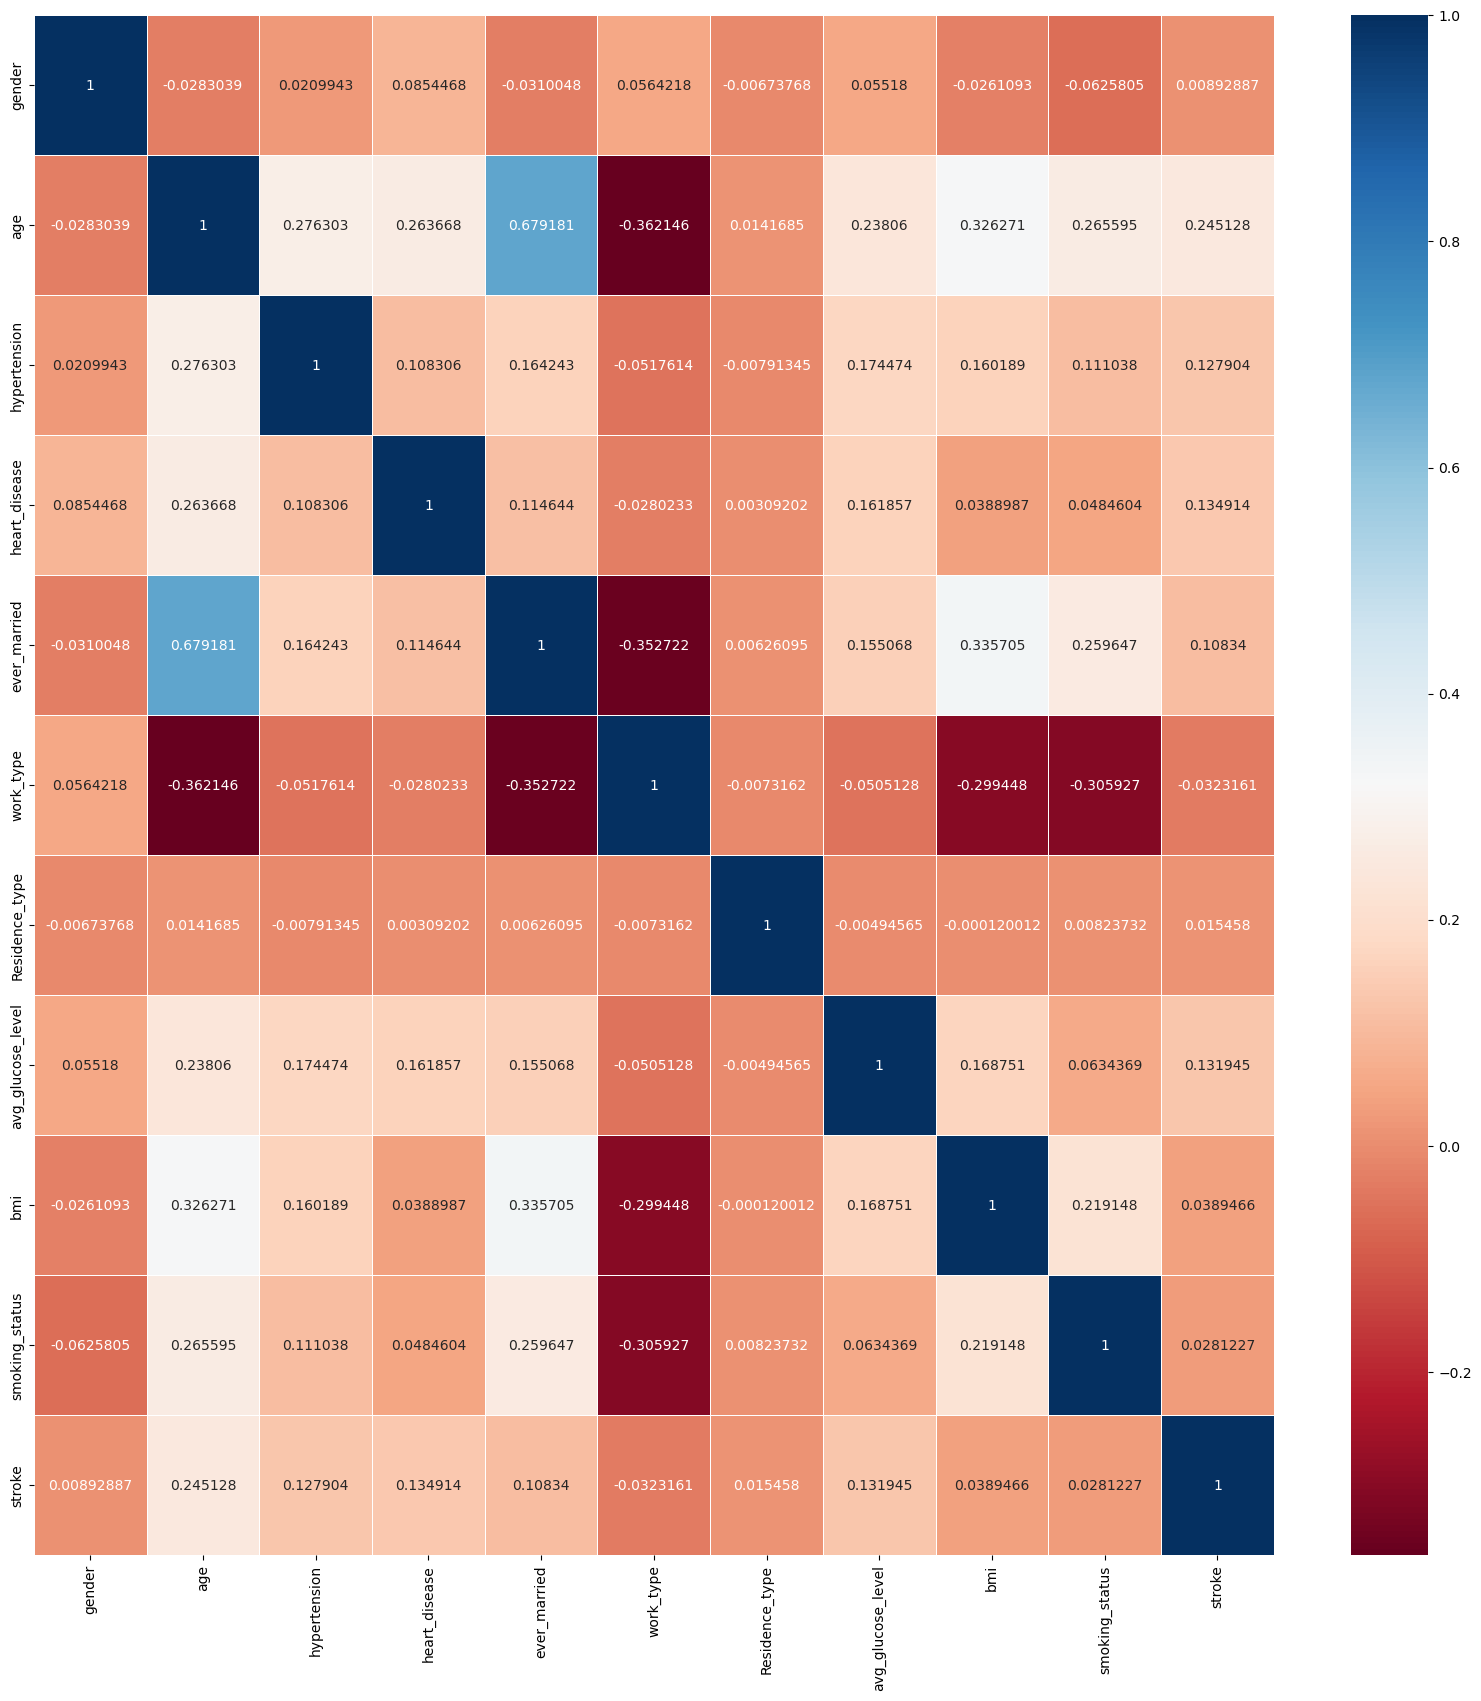

In [132]:
fig = plt.figure(figsize=(20,20))
corr = df1.drop(columns = ['age_group', 'avg_glucose_level_group', 'bmi_group']).corr()
ax = sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

## **Data Balancing** using SMOTE :

- The dataset is **Unbalanced** with a bias towards **No Stroke** in a ratio of **19 : 1** for **No Stroke : Stroke**. We will first balance the dataset using **SMOTE Analysis**!

- In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.
    
- For best performances, combination of undersampling and oversampling is recommended.
- First, we will undersample the majority samples and it is followed by oversampling minority samples.
- For data balancing, we will use **imblearn**.

In [133]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.loc[:,:'smoking_status']
t1 = df1.loc[:,'stroke']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 2490, 1: 2490})

In [134]:
f1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,55,0,0,1,2,1,55.34,27.10,3
1,0,44,0,0,1,2,0,72.03,37.50,3
2,0,47,0,0,1,2,0,204.63,43.40,2
3,1,34,0,0,0,2,0,125.29,33.90,2
4,0,7,0,0,0,4,1,98.22,34.00,0


### Calculation for Data Balancing :

- **Sampling Strategy** : It is a ratio which is the common paramter for oversampling and undersampling.
- **Sampling Strategy** : **( Samples of Minority Class ) / ( Samples of Majority Class )**


- In this case,

    - **Majority Class : No Stroke** : 4861 samples
    - **Minority Class : Stroke** : 249 samples


### Undersampling : Trim down the majority class samples

- Sampling_Strategy = 0.1
- 0.1 = ( 249 ) / Majority Class Samples
- After undersampling, 

    - **Majority Class : No Stroke** : 2490 samples
    - **Minority Class : Stroke** : 249 samples


### Oversampling : Increase the minority class samples

- Sampling_Strategy = 1
- 1 = ( Minority Class Samples ) / 2490
- After oversampling, 

    - **Majority Class : No Stroke** : 2490 samples
    - **Minority Class : Stroke** : 2490 samples
    

- Final Class Samples :

    - **Majority Class : No Stroke** : 2490 samples
    - **Minority Class : Stroke** : 2490 samples


- Here, we balance the data by reducing the majority group samples & then increasing the minority group to majority group. 
- For imbalanced datasets, we **duplicate the data** to deal with the potential bias in the predictions. 
- Due to this duplication process, we are using **synthetic data** for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
- Thus, evaluating models using **accuracy** will be misleading. Instead, we will go for **confusion matrix, ROC-AUC graph and ROC-AUC score** for model evaluation.

### Split Dataset into Train Test dataset

In [135]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

### Data Scaling :

- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

- We have 2 options for data scaling : 
    
    1) **Normalization** 
    
    2) **Standardization**. 


- As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed but the range of values is huge or small as compared to other features.

- From the above transformation, we fit the data on the training data and transform the test data from information based on the training data. If we check the formulas of the **Normalization** & **Standardization**, we use mean, standard deviation, min & max values.

In [136]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
x_train['age'] = mms.fit_transform(x_train[['age']])
x_test['age'] = mms.transform(x_test[['age']])
x_train['avg_glucose_level'] = mms.fit_transform(x_train[['avg_glucose_level']])
x_test['avg_glucose_level'] = mms.transform(x_test[['avg_glucose_level']])

# Standardization
x_train['gender'] = ss.fit_transform(x_train[['gender']]); x_test['gender'] = ss.transform(x_test[['gender']])
x_train['ever_married'] = ss.fit_transform(x_train[['ever_married']]); x_test['ever_married'] = ss.transform(x_test[['ever_married']])
x_train['work_type'] = ss.fit_transform(x_train[['work_type']]); x_test['work_type'] = ss.transform(x_test[['work_type']])
x_train['Residence_type'] = ss.fit_transform(x_train[['Residence_type']]); x_test['Residence_type'] = ss.transform(x_test[['Residence_type']])

In [137]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1815,-0.70,0.44,0,0,0.60,-0.00,-0.83,0.42,39.60,2
307,-0.70,0.49,0,0,-1.66,-0.00,-0.83,0.48,31.30,3
4974,1.42,0.72,0,0,0.60,-0.00,-0.83,0.18,39.24,1
2937,-0.70,0.66,0,0,0.60,-0.00,-0.83,0.17,26.09,2
2637,-0.70,0.95,0,0,0.60,-0.00,1.20,0.06,24.60,2


In [138]:
x_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1302,-0.70,0.56,0,0,0.60,-0.00,-0.83,0.25,20.10,2
3510,-0.70,0.98,0,0,0.60,-0.00,-0.83,0.09,23.79,0
4043,-0.70,0.94,0,0,0.60,-0.00,1.20,0.23,31.12,1
3017,-0.70,0.76,0,0,0.60,-0.00,-0.83,0.27,27.65,1
2146,-0.70,0.73,0,0,0.60,-0.00,-0.83,0.04,36.40,0


# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #0000FF; color: #ADD8E6; padding: 12px; line-height: 1;">Modeling</div></center>

- ### We will use auc-roc score for analysis.  AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.
- ### F1 Score : The F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’.

In [139]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

    # model_evaluation
    
    # Confusion Matrix
    cm = confusion_matrix(y_test.tolist(),classifier.predict(x_test).tolist())
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

- Converting data into the numpy array as model accept in the array format

In [141]:
x_train1, x_test1, y_train1, y_test1 = x_train.values, x_test.values, y_train.values, y_test.values

# 1] LogisticRegression Classifier:

Cross Validation Score :  88.19%
ROC_AUC Score :  82.97%


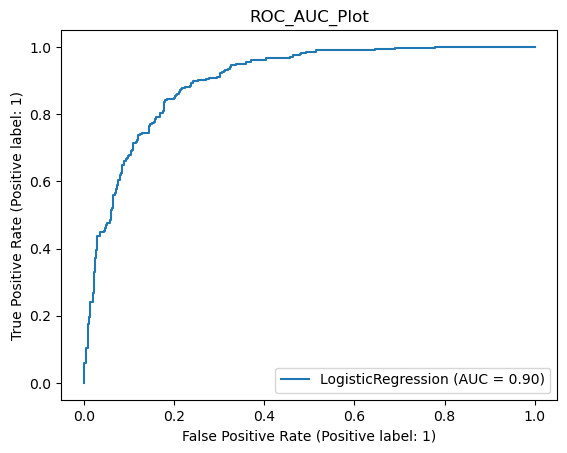

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       367
           1       0.83      0.84      0.83       380

    accuracy                           0.83       747
   macro avg       0.83      0.83      0.83       747
weighted avg       0.83      0.83      0.83       747



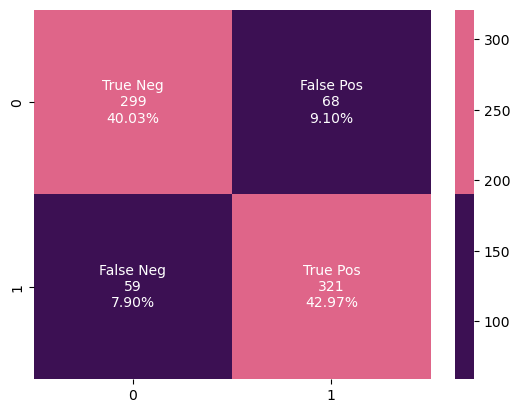

In [142]:
logreg = linear_model.LogisticRegression()
model(logreg, x_train1, y_train1, x_test1, y_test1)

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Stroke)|F1 Score (No Stroke)|
|-|-|-|-|-|-|
|1|LogisticRegression|88.56%%|78.44%|79%|78%|

- ### Hyperparameter Tuning of Logistic Regression

In [143]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(x_train1, y_train1)

In [144]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.881978 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}




- This is another good dataset for understanding how to handle binary classification problems however, imbalance nature of the dataset makes it a tricky task to deal with.


- It's EDA opportunities are immense as well. However, it's EDA insights did contradict with the domain knowledge. 


- In order to understand the significance of **Data Leakage** & it's effects, 2 models are created. You can easily spot the difference in statistical test values, feature selections and machine learning model performance. 


- F1 score of **No Data Leakage Model** suggests that it is more robust and can deal with the unknown data better than the **Data Leakage Model**.

# 2] Decision Tree Classifier:

Cross Validation Score :  86.79%
ROC_AUC Score :  87.76%


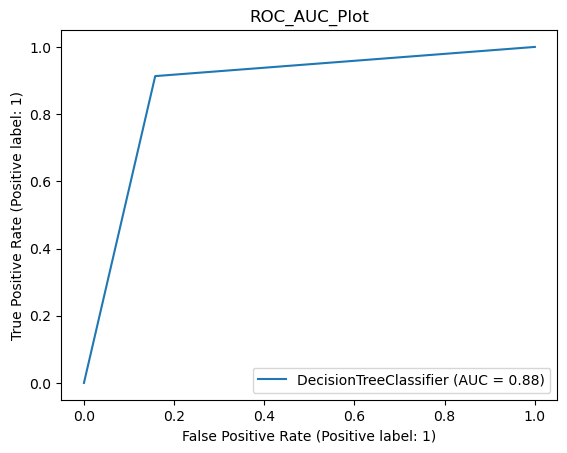

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       367
           1       0.86      0.91      0.88       380

    accuracy                           0.88       747
   macro avg       0.88      0.88      0.88       747
weighted avg       0.88      0.88      0.88       747



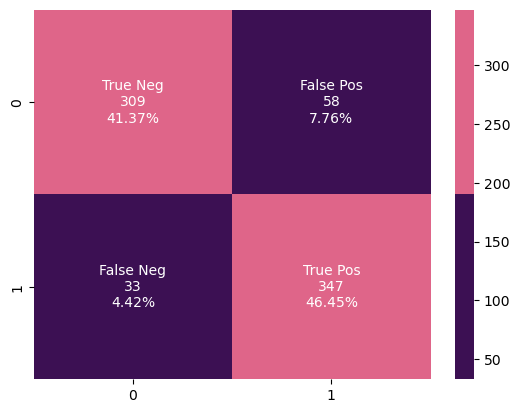

In [77]:
dt = tree.DecisionTreeClassifier()
model(dt,x_train1,y_train1,x_test1,y_test1)

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Stroke)|F1 Score (No Stroke)|
|-|-|-|-|-|-|
|1|DecisionTreeClassifier|86.79%|87.76%|88%|87%|

- ### Hyperparameter Tuning of Decision Tree

In [145]:
min_samples_leaf= [1, 2, 3]
max_depth= [1, 2, 3]
grid = dict(min_samples_leaf=min_samples_leaf,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=dt, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(x_train1, y_train1)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.854218 using {'max_depth': 3, 'min_samples_leaf': 1}


# 3] Neural Network Classifier:

In [146]:
import tensorflow as tf

In [147]:
#Initialising ANN
model = tf.keras.models.Sequential()
#Adding First Hidden Layer
model.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
model.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Output Layer
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling the model
model.compile(optimizer="RMSprop",loss="binary_crossentropy",metrics=['accuracy'])

In [148]:
#Fitting Neural Network
model.fit(x_train1,y_train1,batch_size=32,epochs = 50)

Epoch 1/50
133/133 [==============================] - 1s 1ms/step - loss: 0.9468 - accuracy: 0.5559
Epoch 2/50
133/133 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.6109
Epoch 3/50
133/133 [==============================] - 0s 1ms/step - loss: 0.6197 - accuracy: 0.6357
Epoch 4/50
133/133 [==============================] - 0s 997us/step - loss: 0.5925 - accuracy: 0.6608
Epoch 5/50
133/133 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.6912
Epoch 6/50
133/133 [==============================] - 0s 1ms/step - loss: 0.5548 - accuracy: 0.7068
Epoch 7/50
133/133 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7210
Epoch 8/50
133/133 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.7293
Epoch 9/50
133/133 [==============================] - 0s 1ms/step - loss: 0.5227 - accuracy: 0.7380
Epoch 10/50
133/133 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.74

In [150]:
z=model.predict(x_test1)

24/24 [==============================] - 0s 731us/step


In [151]:
preds=[]
y=z.round().tolist()
for i in y:
    preds.append(int(i[0]))

In [152]:
from sklearn import metrics
metrics.confusion_matrix(y_test1, np.array(preds))

array([[259, 108],
       [ 32, 348]], dtype=int64)

In [153]:
roc_auc_score(y_test1,np.array(preds))

0.8107557722644485

In [154]:
print(classification_report(y_test1, np.array(preds)))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       367
           1       0.76      0.92      0.83       380

    accuracy                           0.81       747
   macro avg       0.83      0.81      0.81       747
weighted avg       0.83      0.81      0.81       747



|Sr. No.|ML Algorithm|ROC AUC Score|F1 Score (Stroke)|F1 Score (No Stroke)|
|-|-|-|-|-|
|1|Neural Network|81.07%|83.00%|79.00%|